## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

## <span style="color:blue">Alunos</span>

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


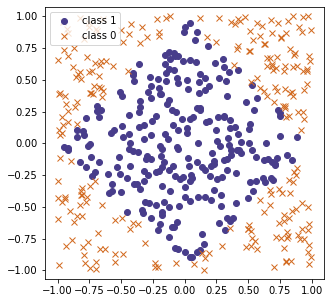

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def accuracy_fn(y_true, y_pred):
    """
    Accuracy function
    """
    acertos = 0
    y_pred_new = (y_pred > 0.5).astype(int)
    for i in range(len(y_true)):
        if(y_true[i] == y_pred_new[i]):
             acertos += 1
    return acertos/len(y_true)

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient



def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

Complete the pseudocode below

_____________________________
## Diamond Pattern

Para uma melhor análise, fixamos os valores de W1 e W2 iniciais iguais para todos os padrões, assim conseguimos estabelecer um padrão comparativo melhor.

In [4]:
np.random.seed(1241)
W_1_default = np.random.uniform(-1,1, (3,4))
W_2_default = np.random.uniform(-1,1, 4)

It:  200
Loss:  0.6515764296037007
Accuracy:  0.634
It:  400
Loss:  0.9426478058265434
Accuracy:  0.49
It:  600
Loss:  0.5774532090767928
Accuracy:  0.794
It:  800
Loss:  0.6044652698320503
Accuracy:  0.8
It:  1000
Loss:  0.5476891601461155
Accuracy:  0.806
It:  1200
Loss:  0.5360896923115948
Accuracy:  0.814
It:  1400
Loss:  0.5264897414212475
Accuracy:  0.822
It:  1600
Loss:  0.5164464011845871
Accuracy:  0.828
It:  1800
Loss:  0.5080588710968966
Accuracy:  0.838
It:  2000
Loss:  0.4872205042630568
Accuracy:  0.838
It:  2200
Loss:  0.4643692960368312
Accuracy:  0.858
It:  2400
Loss:  0.35504350673781393
Accuracy:  0.844
It:  2600
Loss:  0.3410131498580008
Accuracy:  0.862
It:  2800
Loss:  0.24457957648492945
Accuracy:  0.876
It:  3000
Loss:  0.2803545919252465
Accuracy:  0.85
It:  3200
Loss:  0.26336055397681774
Accuracy:  0.852
It:  3400
Loss:  0.26056982995074407
Accuracy:  0.852
It:  3600
Loss:  0.2587393982986136
Accuracy:  0.856
It:  3800
Loss:  0.25736400543926324
Accuracy:  0.

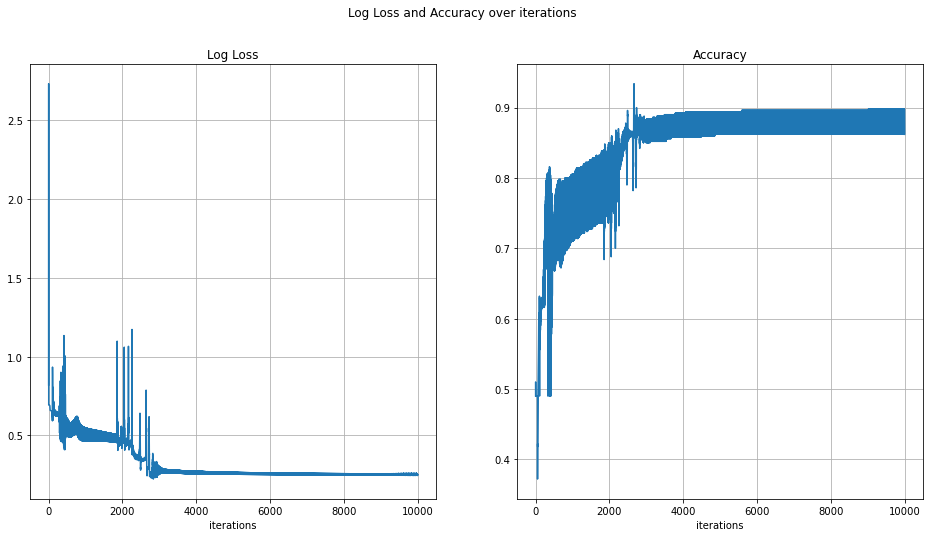

In [5]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_______________________________
## Circle Pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


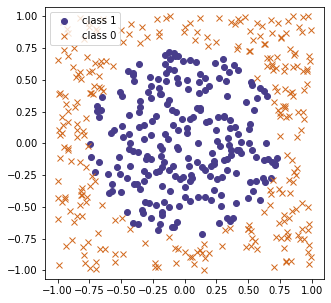

In [17]:
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.4402442693986687
Accuracy:  0.542
It:  400
Loss:  0.4300047798960113
Accuracy:  0.542
It:  600
Loss:  0.42437951612386376
Accuracy:  0.542
It:  800
Loss:  0.42173519758970257
Accuracy:  0.542
It:  1000
Loss:  0.4201710188414948
Accuracy:  0.542
It:  1200
Loss:  0.41909229404333825
Accuracy:  0.542
It:  1400
Loss:  0.4182959185966839
Accuracy:  0.542
It:  1600
Loss:  0.41768018529415324
Accuracy:  0.542
It:  1800
Loss:  0.41718790401200373
Accuracy:  0.542
It:  2000
Loss:  0.41678418507441756
Accuracy:  0.542
It:  2200
Loss:  0.4164464079248137
Accuracy:  0.542
It:  2400
Loss:  0.4161591978505262
Accuracy:  0.542
It:  2600
Loss:  0.41591170349669393
Accuracy:  0.542
It:  2800
Loss:  0.4156960261795894
Accuracy:  0.542
It:  3000
Loss:  0.41550626662788204
Accuracy:  0.542
It:  3200
Loss:  0.4153379217046682
Accuracy:  0.542
It:  3400
Loss:  0.4151874889402619
Accuracy:  0.542
It:  3600
Loss:  0.41505219939206256
Accuracy:  0.542
It:  3800
Loss:  0.4149298324506827
Accur

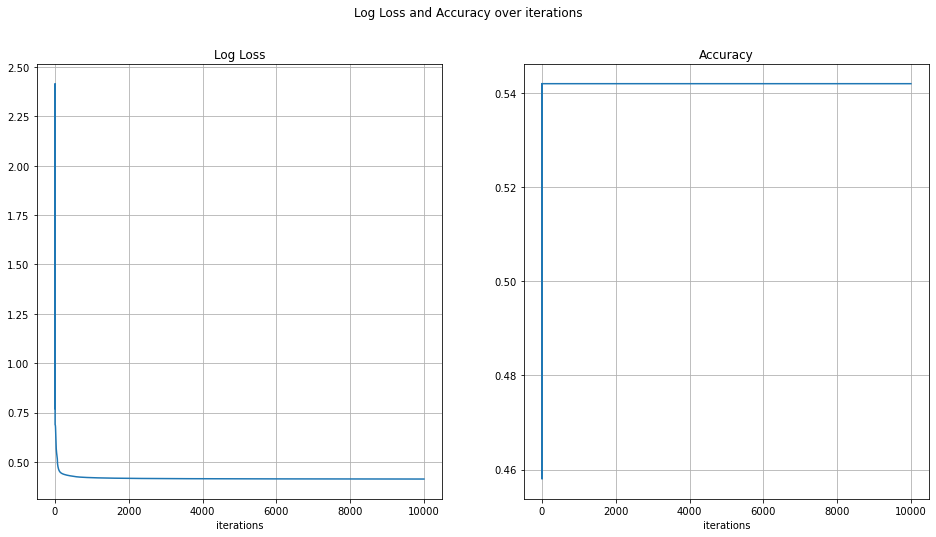

In [18]:
#### Initialize the network parameter
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

______________________________
## Centered Pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


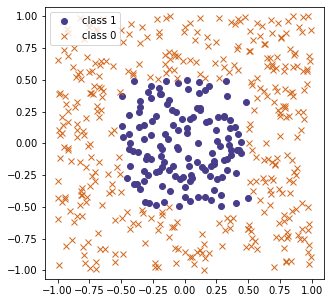

In [19]:
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.2847701590602134
Accuracy:  0.73
It:  400
Loss:  0.2777213530194004
Accuracy:  0.73
It:  600
Loss:  0.2753503246610199
Accuracy:  0.73
It:  800
Loss:  0.27401949658958774
Accuracy:  0.742
It:  1000
Loss:  0.19208138732787594
Accuracy:  0.92
It:  1200
Loss:  0.10065354281415939
Accuracy:  0.952
It:  1400
Loss:  0.08662182086352585
Accuracy:  0.962
It:  1600
Loss:  0.08050464385825522
Accuracy:  0.966
It:  1800
Loss:  0.07741361190186742
Accuracy:  0.97
It:  2000
Loss:  0.07558220766934093
Accuracy:  0.97
It:  2200
Loss:  0.07443735383013694
Accuracy:  0.972
It:  2400
Loss:  0.07372965369159652
Accuracy:  0.972
It:  2600
Loss:  0.07334441795609387
Accuracy:  0.972
It:  2800
Loss:  0.07321338700930312
Accuracy:  0.972
It:  3000
Loss:  0.07325268413198917
Accuracy:  0.974
It:  3200
Loss:  0.0733361495357707
Accuracy:  0.976
It:  3400
Loss:  0.07335527858118249
Accuracy:  0.976
It:  3600
Loss:  0.07328777224982141
Accuracy:  0.976
It:  3800
Loss:  0.07316426079271632
Accur

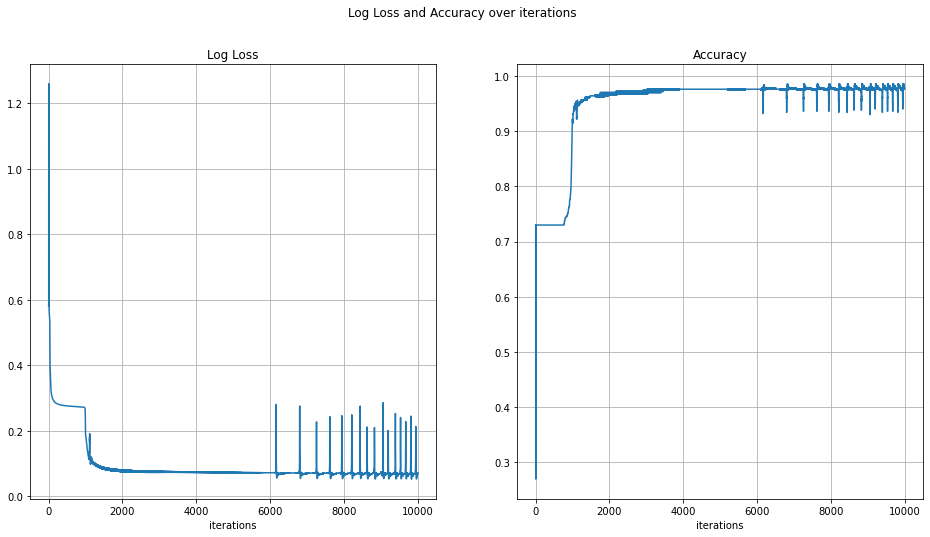

In [20]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_______________________________
## Thick Right Angle pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


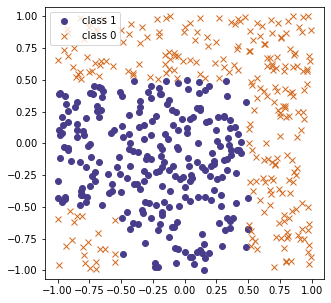

In [21]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)
print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.18885621063332086
Accuracy:  0.852
It:  400
Loss:  0.1751567431003964
Accuracy:  0.86
It:  600
Loss:  0.16930383879110736
Accuracy:  0.872
It:  800
Loss:  0.1658392197719197
Accuracy:  0.88
It:  1000
Loss:  0.1634937458082761
Accuracy:  0.888
It:  1200
Loss:  0.161780366224093
Accuracy:  0.892
It:  1400
Loss:  0.16046418348883543
Accuracy:  0.896
It:  1600
Loss:  0.15941605095081288
Accuracy:  0.9
It:  1800
Loss:  0.15855846170734636
Accuracy:  0.902
It:  2000
Loss:  0.1578417663528436
Accuracy:  0.902
It:  2200
Loss:  0.1572325111515998
Accuracy:  0.904
It:  2400
Loss:  0.15670724252595808
Accuracy:  0.906
It:  2600
Loss:  0.15624898793927133
Accuracy:  0.906
It:  2800
Loss:  0.15584513950483125
Accuracy:  0.906
It:  3000
Loss:  0.15548611999075218
Accuracy:  0.906
It:  3200
Loss:  0.15516450988415165
Accuracy:  0.908
It:  3400
Loss:  0.15487445861817953
Accuracy:  0.908
It:  3600
Loss:  0.15461127701265615
Accuracy:  0.91
It:  3800
Loss:  0.15437114809908004
Accurac

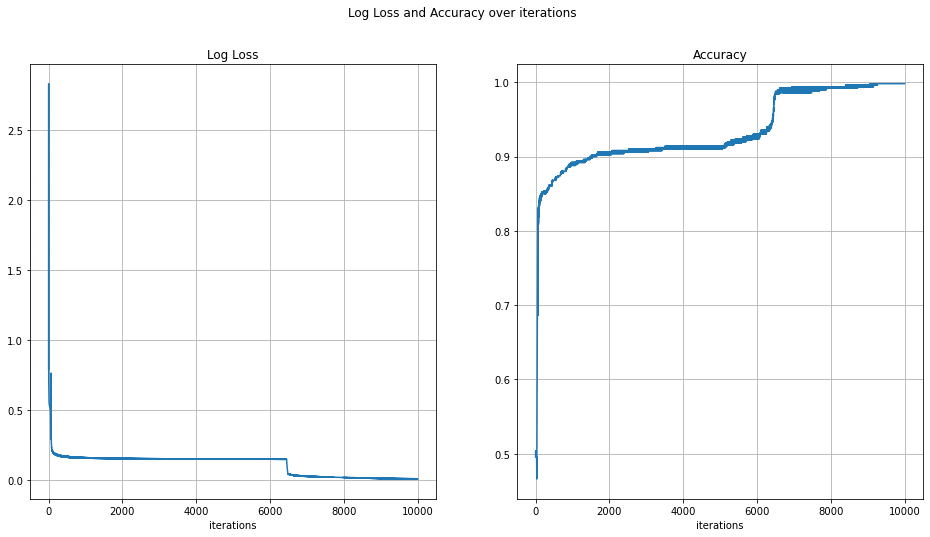

In [22]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

_________________________
## Thin right angle pattern

shape of x_mat_full is (500, 3)
shape of y is (500,)


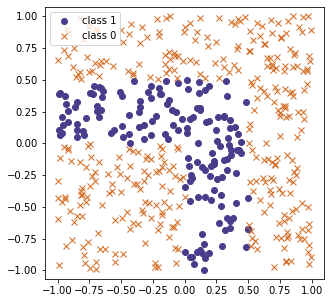

In [23]:
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

It:  200
Loss:  0.5092962792184106
Accuracy:  0.69
It:  400
Loss:  0.41817024152376603
Accuracy:  0.69
It:  600
Loss:  0.3360271878400106
Accuracy:  0.69
It:  800
Loss:  0.3298578524293085
Accuracy:  0.69
It:  1000
Loss:  0.32642278906558647
Accuracy:  0.69
It:  1200
Loss:  0.32408432399474996
Accuracy:  0.69
It:  1400
Loss:  0.3223416657204088
Accuracy:  0.7
It:  1600
Loss:  0.3209706895062091
Accuracy:  0.71
It:  1800
Loss:  0.3198514550623871
Accuracy:  0.72
It:  2000
Loss:  0.31891233053973655
Accuracy:  0.734
It:  2200
Loss:  0.3181069608719675
Accuracy:  0.748
It:  2400
Loss:  0.317402966893041
Accuracy:  0.756
It:  2600
Loss:  0.3167747295154922
Accuracy:  0.764
It:  2800
Loss:  0.31619299214825625
Accuracy:  0.772
It:  3000
Loss:  0.31554791229846696
Accuracy:  0.788
It:  3200
Loss:  0.18672083632138772
Accuracy:  0.884
It:  3400
Loss:  0.17854758822372524
Accuracy:  0.89
It:  3600
Loss:  0.1753855019823638
Accuracy:  0.89
It:  3800
Loss:  0.17303813373896235
Accuracy:  0.892
I

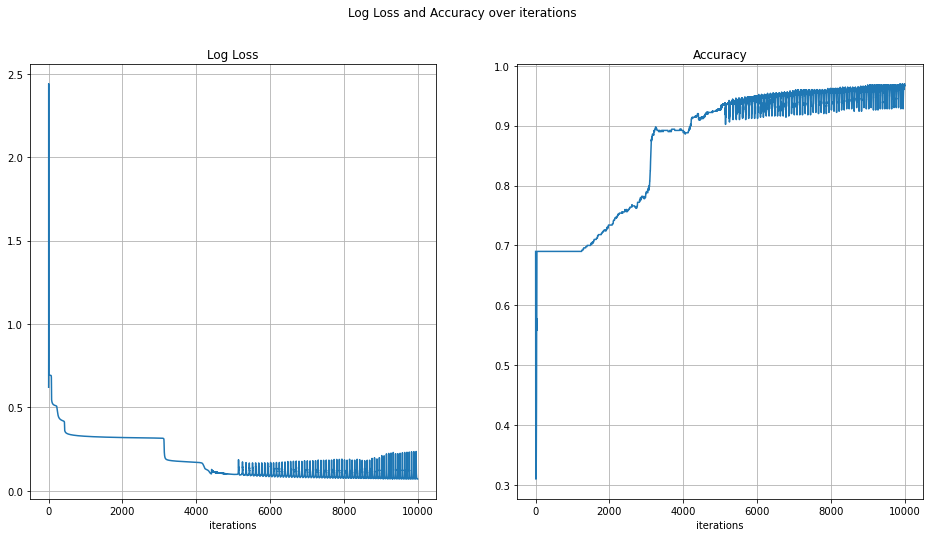

In [24]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rate = 0.05
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1,W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*gradient[0]
    W_2 = W_2 - learning_rate*gradient[1]
    
    ### Compute the loss and accuracy
    accuracy = accuracy_fn(y, y_pred)
    accuracies.append(accuracy)
    
    loss = loss_fn(y, y_pred)
    loss_vals.append(loss)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i+1) % 200 == 0):
        print("==============================")
        print("It: ", str(i+1))
        print("Loss: ", str(loss))
        print("Accuracy: ", str(accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

___________________________
## Análise de Resultados

### Análise dos padrões

Para analisar os padrões, fixamos os valores do número de iterações em 10000 e a taxa de aprendizado de 5% e medimos para os diferentes padrões dados: diamante, círculo, central, thick right angle e thin right angle. Como foi possível observar, o algoritmo teve pior desempenho com o padrão de Diamante, tendo um log loss de 0.43, aproximadamente, e o melhor padrão foi o Thick Right Angle, com um log loss de 0.02 e uma acurácia de 0.99. Outra coisa que podemos observar é a instabilidade existente nos gráficos do thin e do thick right angle para calcular o log loss quanto a acurácia. Outra coisa que é possível notar é que a acurácia para os três primeiros padrões se manteve a mesma no processo, além disso o log loss decaiu de forma estável. 

### Análise da taxa de aprendizagem e do número de iterações
Inicialmente, usando somente o padrão Diamante para fazer a análise. Desta forma iremos variar os valores de taxa de aprendizado e número de iterações e medir os resultados encontrados.

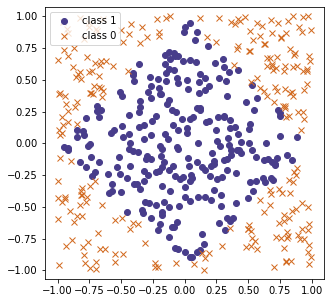

In [29]:
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

#### Taxa de aprendizagem

--------------------------------
Learning Rate:  0.05
It:  10000
Loss:  0.24792035086753125
Accuracy:  0.862
--------------------------------
Learning Rate:  0.1
It:  10000
Loss:  0.32882037109798185
Accuracy:  0.87
--------------------------------
Learning Rate:  0.3
It:  10000
Loss:  0.4674999347915605
Accuracy:  0.49
--------------------------------
Learning Rate:  0.5
It:  10000
Loss:  0.4650897634051756
Accuracy:  0.49


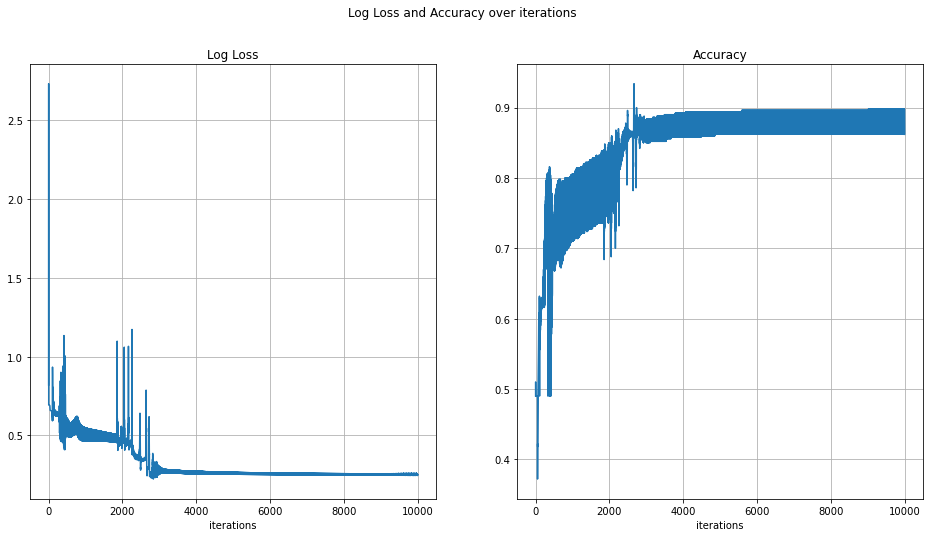

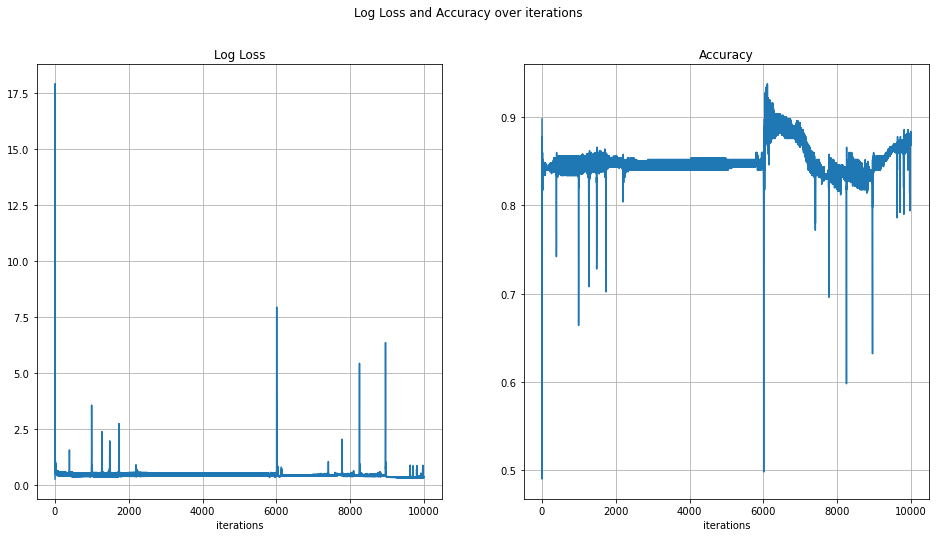

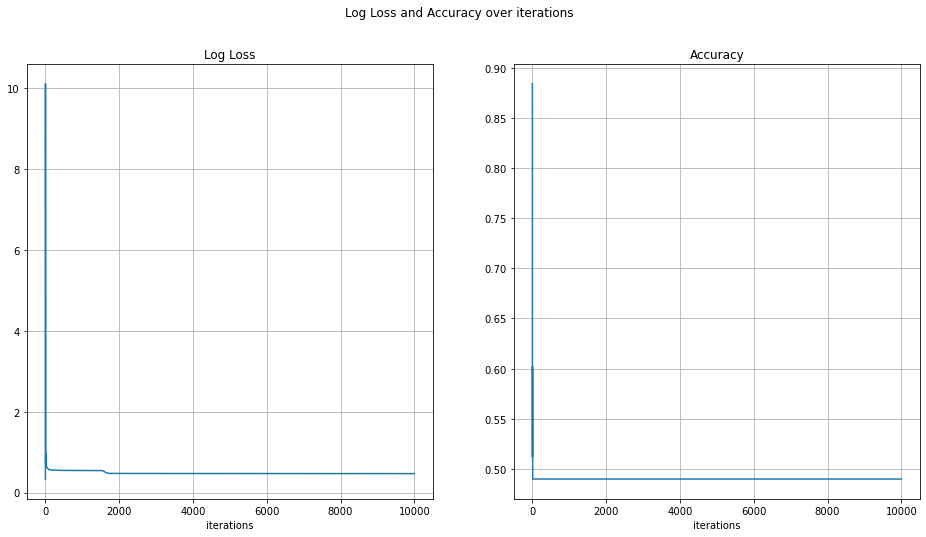

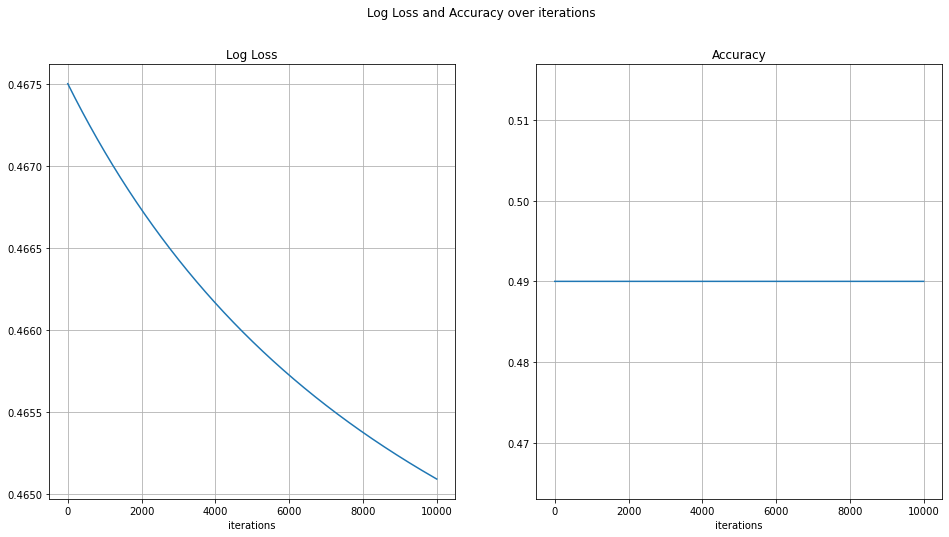

In [31]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iter = 10000
learning_rates = [0.05, 0.1, 0.3, 0.5]
x_mat = x_mat_full

for learning_rate in learning_rates:
    y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)
    print('--------------------------------')
    print('Learning Rate: ', learning_rate)
    loss_vals, accuracies = [], []
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1,W_2)
        ## Update the weight matrices
        W_1 = W_1 - learning_rate*gradient[0]
        W_2 = W_2 - learning_rate*gradient[1]
        
        ### Compute the loss and accuracy
        accuracy = accuracy_fn(y, y_pred)
        accuracies.append(accuracy)
        
        loss = loss_fn(y, y_pred)
        loss_vals.append(loss)
        
        ## Print the loss and accuracy for every 200th iteration
        if((i+1) % 10000 == 0):
            print("==============================")
            print("It: ", str(i+1))
            print("Loss: ", str(loss))
            print("Accuracy: ", str(accuracy))
        
    plot_loss_accuracy(loss_vals, accuracies)

Como experimentado acima, a melhor taxa de aprendizado foi a de 5%, onde foi obtido um log loss de 0.24. Mesmo que essa taxa possua uma acurácia ligeiramente menor que a de 10%, o log loss ainda é menor.

#### Número de iterações

--------------------------------
Numero de iterações:  100
It:  100
Loss:  0.6041290595593685
Accuracy:  0.608
--------------------------------
Numero de iterações:  500
It:  500
Loss:  0.5774532090767928
Accuracy:  0.794
--------------------------------
Numero de iterações:  1000
It:  1000
Loss:  0.5164464011845871
Accuracy:  0.828
--------------------------------
Numero de iterações:  5000
It:  5000
Loss:  0.2505247307916683
Accuracy:  0.862
--------------------------------
Numero de iterações:  10000
It:  10000
Loss:  0.2471285967218876
Accuracy:  0.864


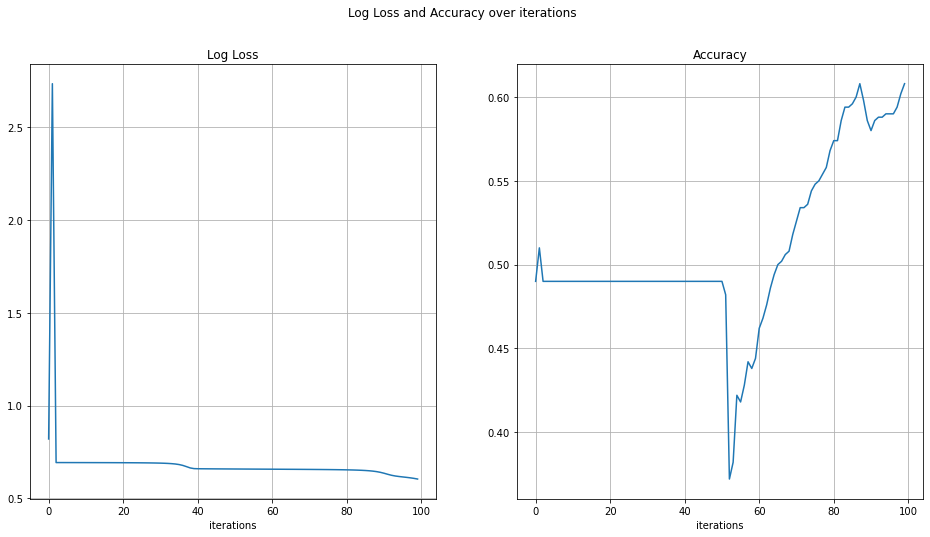

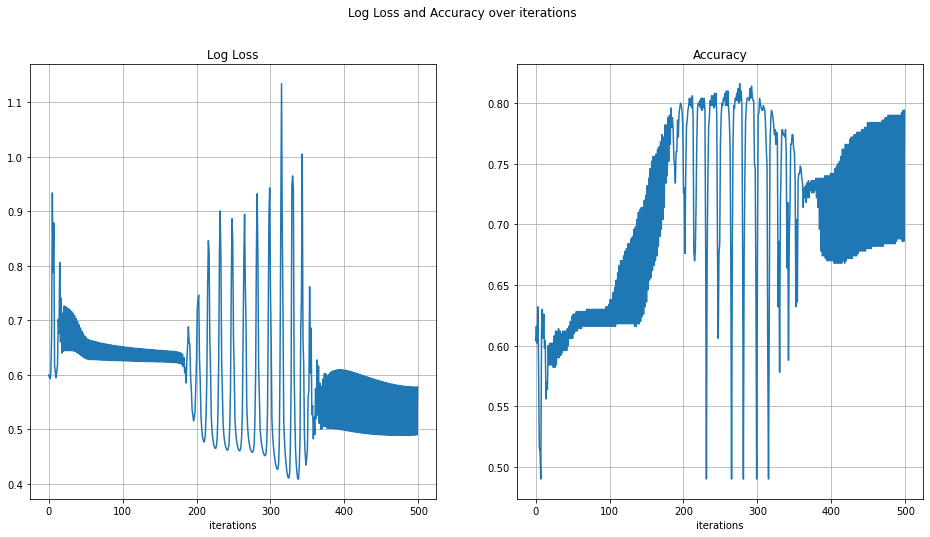

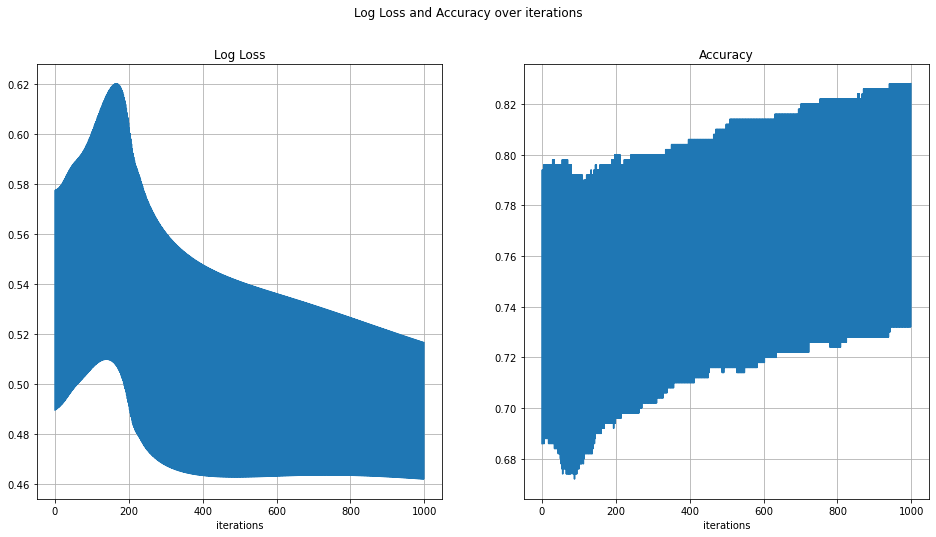

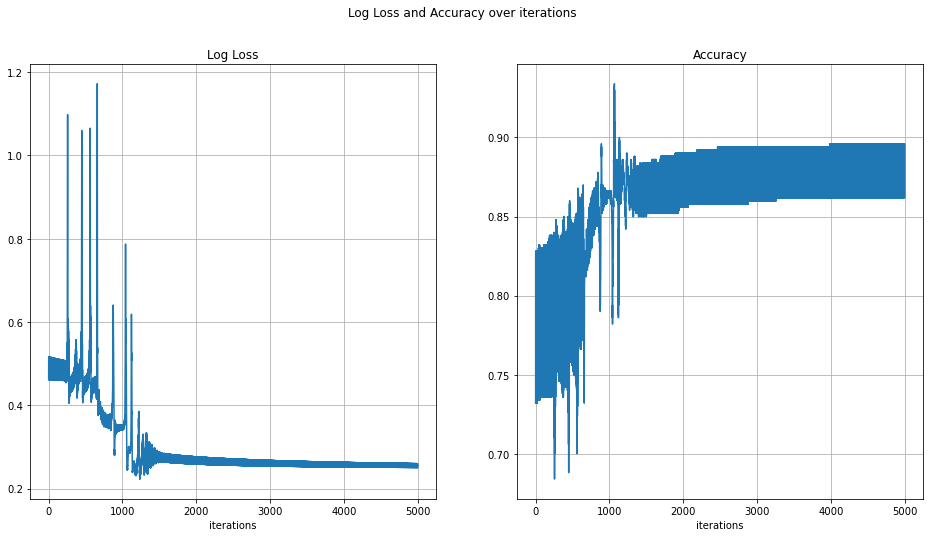

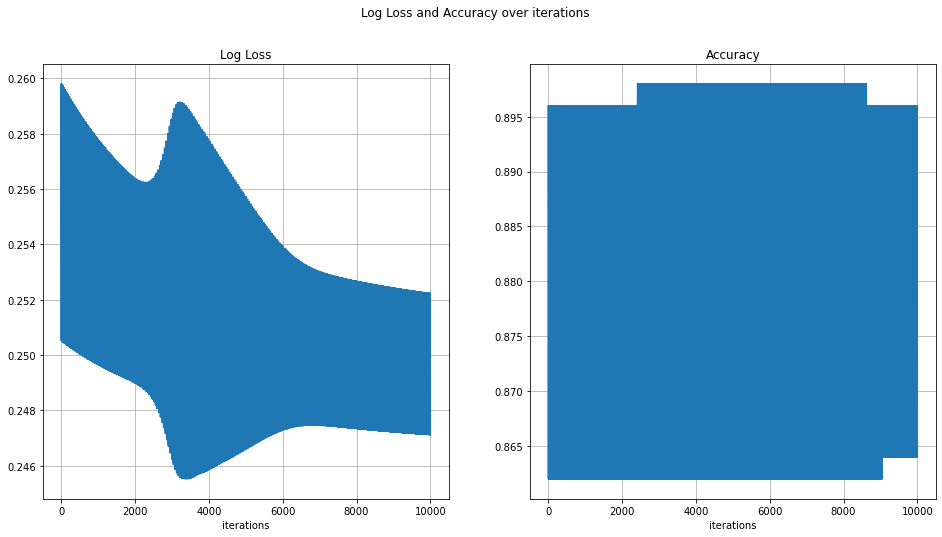

In [34]:
#### Initialize the network parameters
W_1 = W_1_default.copy()
W_2 = W_2_default.copy()
num_iters = [100,500,1000,5000,10000]
learning_rate = 0.05
x_mat = x_mat_full

for num_iter in num_iters:
    y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)
    print('--------------------------------')
    print('Numero de iterações: ', num_iter)
    loss_vals, accuracies = [], []
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1,W_2)
        ## Update the weight matrices
        W_1 = W_1 - learning_rate*gradient[0]
        W_2 = W_2 - learning_rate*gradient[1]
        
        ### Compute the loss and accuracy
        accuracy = accuracy_fn(y, y_pred)
        accuracies.append(accuracy)
        
        loss = loss_fn(y, y_pred)
        loss_vals.append(loss)
        
        ## Print the loss and accuracy for every 200th iteration
        if((i+1) % num_iter == 0):
            print("==============================")
            print("It: ", str(i+1))
            print("Loss: ", str(loss))
            print("Accuracy: ", str(accuracy))
        
    plot_loss_accuracy(loss_vals, accuracies)

Ao analisarmos o número de iterações usadas, vimos que com 10000 iterações, numa taxa de aprendizado de 5%, tivemos o melhor resultado dentre os valores experimentados. Pelos gráfico é possível notar que houve uma grande oscilação entre os valores.